In [33]:
#library
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
2x2 chessboard

In [55]:
# sample code from diver
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [56]:
small_board_ndarray = np.array(small_board_list)
small_board_ndarray = small_board_ndarray.reshape(2,2)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[[1 2]
 [4 8]]


# Problem 2
nxm chessboard extension, function

In [68]:
def calculate_wheat_chessboard (n,m):
    elements = n*m
    board_list = [1]
    for _ in range(elements - 1):
        board_list.append(2*board_list[-1])  
    board_array = np.array(board_list)
    board_array = board_array.reshape(n,m)
    number_wheat = np.sum(board_array)
    return number_wheat
total_wheat_8 = calculate_wheat_chessboard(8,8)
print("Number of wheats on the 8x8 chessboard:",total_wheat_8)

Number of wheats on the 8x8 chessboard: 1.84467440737e+19


# Problem 3
bar chart, average of column

Number of wheats on the 8x8 chessboard: 1.84467440737e+19
Average of columns: [  9.04252160e+15   1.80850432e+16   3.61700864e+16   7.23401728e+16
   1.44680346e+17   2.89360691e+17   5.78721383e+17   1.15744277e+18]


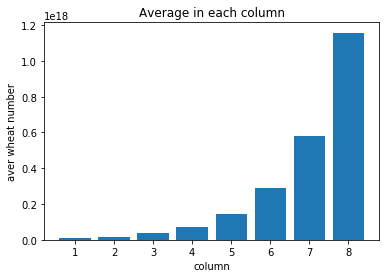

In [69]:
def calculate_wheat_chessboard (n,m):
    elements = n*m
    board_list = [1]
    for _ in range(elements - 1):
        board_list.append(2*board_list[-1])  
    board_array = np.array(board_list)
    board_array = board_array.reshape(n,m)
    number_wheat = np.sum(board_array)
    aver_col_wheat = np.average(board_array,axis=0)
    return board_array,number_wheat, aver_col_wheat
array_8,total_wheat_8, aver_col = calculate_wheat_chessboard(8,8)
print("Number of wheats on the 8x8 chessboard:",total_wheat_8)
print("Average of columns:",aver_col)
plt.xlabel("column")
plt.ylabel("aver wheat number")
plt.title("Average in each column")
plt.bar(np.arange(1,9), aver_col)
plt.show()

# Problem 4
Heatmap

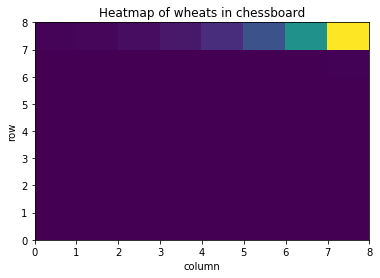

In [70]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("Heatmap of wheats in chessboard")
plt.pcolor(array_8)
plt.show()

# Problem 5
How many times is the second half is greater than first half?

In [71]:
print("The second half has ",np.sum(array_8[4:8][:])/np.sum(array_8[0:4][:]),"times many wheats compared to the first half of the chessboard.")

The second half has  4294967296.0 times many wheats compared to the first half of the chessboard.


# Problem 6
Mass calculation

In [80]:
# same function as Problem 2, different method
def calculate_wheat(n,m):
    elements = n*m
    indices_of_squares = np.arange(elements).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_array = board_ndarray.reshape(n,m)  
    number_wheat = np.sum(board_array)
    # one grain of wheat is 65mg = 0.000065 kg
    weight = number_wheat * 0.000065
    return number_wheat, weight
total_wheat,weight_wheat = calculate_wheat(8,8)
print("Number of wheats on the 8x8 chessboard:",total_wheat)
print("Weight of the all wheats on the chessboard:",weight_wheat,"kg")

Number of wheats on the 8x8 chessboard: 18446744073709551615
Weight of the all wheats on the chessboard: 1.19903836479e+15 kg


# Problem 7
calculation time

In [83]:
# method 1
%timeit elements = 64
board_list = [1]
for _ in range(elements - 1):
    board_list.append(2*board_list[-1])  
board_array = np.array(board_list)
board_array = board_array.reshape(8,8)

59.1 ns ± 14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [84]:
# method 2
%timeit elements = 64
indices_of_squares = np.arange(elements).astype(np.uint64)
board_ndarray = 2**indices_of_squares
board_array = board_ndarray.reshape(8,8)

21.5 ns ± 0.51 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [89]:
#method 3
%timeit elements = 64
board_ndarray = np.array([1], dtype=np.uint64)
for _ in range(elements - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
board_array = board_ndarray.reshape(8,8)

21.6 ns ± 0.26 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
